In [16]:
#import libraries

#NUmber crunching
import pandas as pd
import numpy as np

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit


#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Transformers and pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

## Multivariate Linear Regression on Parkinsons Dataset. 

## Problem Statement: The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures. In this assignment we have predicted the 'total_UPDRS' using the 16 voice measures.

#### Loading dataset: Parkinsons_updrs

In [9]:
pd.set_option("display.max_columns", 24)

In [48]:
parkinsons = pd.read_csv("parkinsons_updrs.data")

#### EDA

In [60]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   subject#       5875 non-null   int64   
 1   age            5875 non-null   int64   
 2   sex            5875 non-null   int64   
 3   test_time      5875 non-null   float64 
 4   motor_UPDRS    5875 non-null   float64 
 5   total_UPDRS    5875 non-null   float64 
 6   Jitter(%)      5875 non-null   float64 
 7   Jitter(Abs)    5875 non-null   float64 
 8   Jitter:RAP     5875 non-null   float64 
 9   Jitter:PPQ5    5875 non-null   float64 
 10  Jitter:DDP     5875 non-null   float64 
 11  Shimmer        5875 non-null   float64 
 12  Shimmer(dB)    5875 non-null   float64 
 13  Shimmer:APQ3   5875 non-null   float64 
 14  Shimmer:APQ5   5875 non-null   float64 
 15  Shimmer:APQ11  5875 non-null   float64 
 16  Shimmer:DDA    5875 non-null   float64 
 17  NHR            5875 non-null   fl

In [11]:
parkinsons.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  \
0     0.000034     0.00401      0.00317     0.01204  0.02565        0.230   
1     0.000017     0.00132      0.00150     0.00395  0.02024        0.179   
2     0.000025     0.00205      0.00208     0.00616  0.01675        0.181   
3     0.000027     0.00191      0.00264     0.00573  0.02309        0.327   
4     0.000020     0.00093      0.00130     0.00278  0.01703        0.176   

   Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR  \
0       0.01438       0.01309        0.01662      0.04314  0.014290  21.640   
1       0.00994       0.01072        0.01689      0.02982  0.011112  27.183   
2       0.00734       0.00844        0.01458      0.02202  0.020220  23.047   
3       0.01106       0.01265        0.01963      0.03317  0.027837  24.445   
4       0.00679       0.00929        0.01819      0.02036  0.011625  26.126   

      RPDE      DFA      PPE  
0  0.41888  0.54842  0.16006  
1  0.43493  0.56477  0.10810  
2  0.46222  0.54405  0.21014  
3  0.48730  0.57794  0.33277  
4  0.47188  0.56122  0.19361

array([[<AxesSubplot:title={'center':'subject#'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'test_time'}>,
        <AxesSubplot:title={'center':'motor_UPDRS'}>],
       [<AxesSubplot:title={'center':'total_UPDRS'}>,
        <AxesSubplot:title={'center':'Jitter(%)'}>,
        <AxesSubplot:title={'center':'Jitter(Abs)'}>,
        <AxesSubplot:title={'center':'Jitter:RAP'}>,
        <AxesSubplot:title={'center':'Jitter:PPQ5'}>],
       [<AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'Shimmer'}>,
        <AxesSubplot:title={'center':'Shimmer(dB)'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ11'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>,
        <AxesSubplot:title={'center':'HNR'}>,
        <Axe

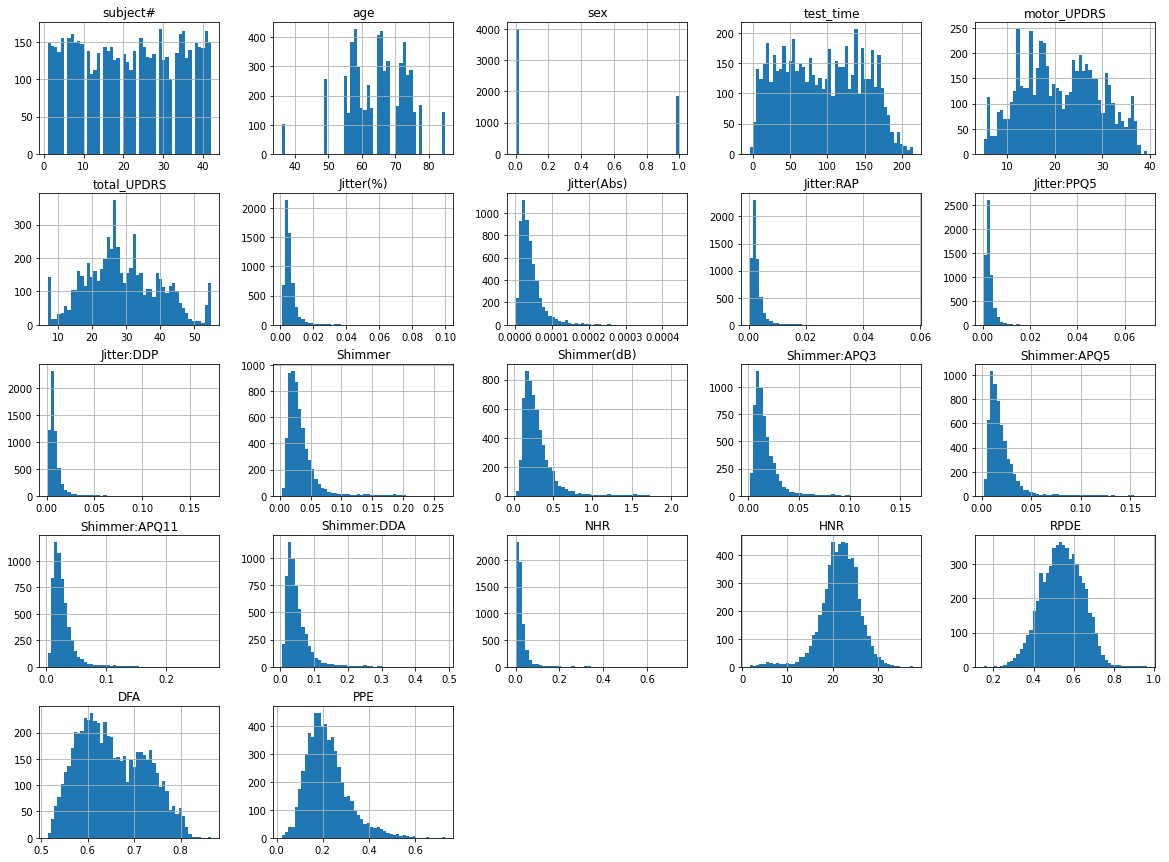

In [12]:
parkinsons.hist(bins = 50, figsize = (20, 15))

<Figure size 1008x576 with 0 Axes>

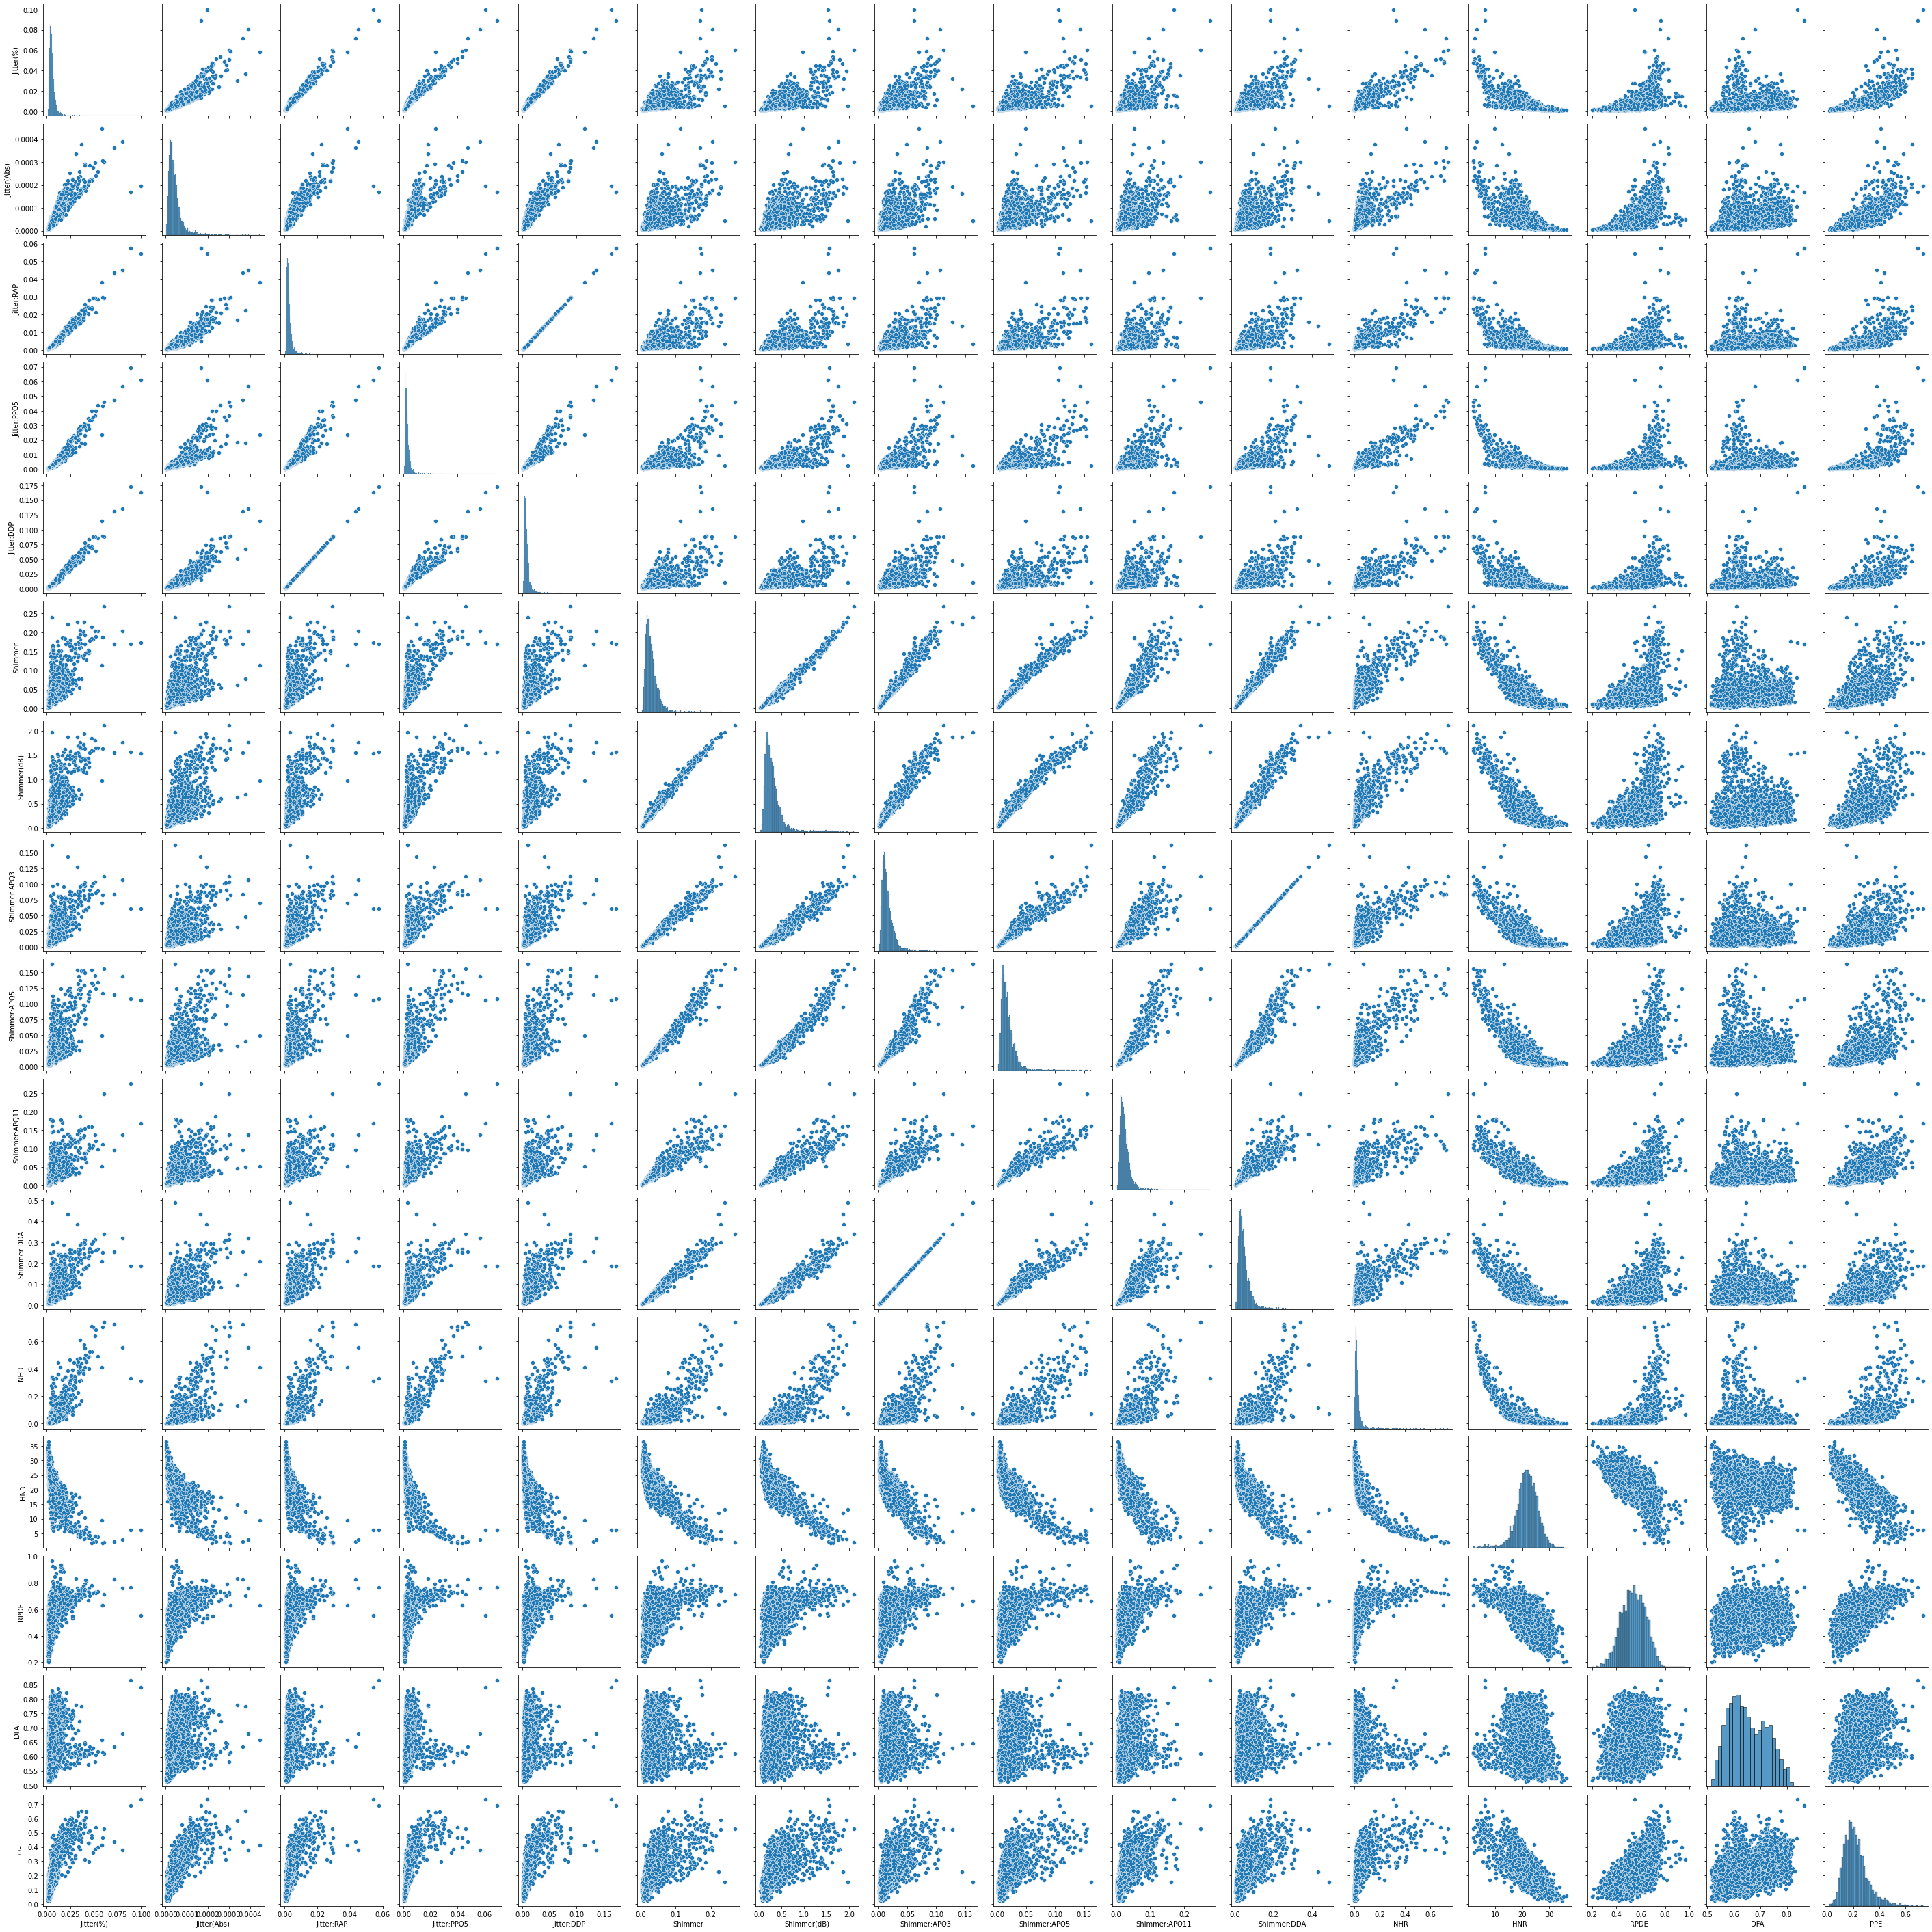

In [107]:
plt.figure(figsize = (14,8))
sns.pairplot(parkinsons)
plt.show()

In [14]:
parkinsons.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     29.018942     0.006154     0.000044     0.002987     0.003277   
std      10.700283     0.005624     0.000036     0.003124     0.003732   
min       7.000000     0.000830     0.000002     0.000330     0.000430   
25%      21.371000     0.003580     0.000022     0.001580     0.001820   
50%      27.576000     0.004900     0.000035     0.002250     0.002490   
75%      36.399000     0.006800     0.000053     0.003290     0.003460   
max      54.992000     0.099990     0.000446     0.057540     0.069560   

        Jitter:DDP      Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
count  5875.000000  5875.000000  5875.000000   5875.000000   5875.000000   
mean      0.008962     0.034035     0.310960      0.017156      0.020144   
std       0.009371     0.025835     0.230254      0.013237      0.016664   
min       0.000980     0.003060     0.026000      0.001610      0.001940   
25%       0.004730     0.019120     0.175000      0.009280      0.010790   
50%       0.006750     0.027510     0.253000      0.013700      0.015940   
75%       0.009870     0.039750     0.365000      0.020575      0.023755   
max       0.172630     0.268630     2.107000      0.162670      0.167020   

       Shimmer:APQ11  Shimmer:DDA          NHR          HNR         RPDE  \
count    5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean        0.027481     0.051467     0.032120    21.679495     0.541473   
std         0.019986     0.039711     0.059692     4.291096     0.100986   
min         0.002490     0.004840     0.000286     1.659000     0.151020   
25%         0.015665     0.027830     0.010955    19.406000     0.469785   
50%         0.022710     0.041110     0.018448    21.920000     0.542250   
75%         0.032715     0.061735     0.031463    24.444000     0.614045   
max         0.275460     0.488020     0.748260    37.875000     0.966080   

               DFA          PPE  
count  5875.000000  5875.000000  
mean      0.653240     0.219589  
std       0.070902     0.091498  
min       0.514040     0.021983  
25%       0.596180     0.156340  
50%       0.643600     0.205500  
75%       0.711335     0.264490  
max       0.865600     0.731730

### Splitting into train-test set: Stratified sampling based on gender.

Correlation matrix

In [49]:
corr_matrix = parkinsons.corr()

In [50]:
corr_matrix

subject#       age       sex  test_time  motor_UPDRS  \
subject#       1.000000 -0.030864  0.286851  -0.000882     0.252919   
age           -0.030864  1.000000 -0.041602   0.019884     0.273665   
sex            0.286851 -0.041602  1.000000  -0.009805    -0.031205   
test_time     -0.000882  0.019884 -0.009805   1.000000     0.067918   
motor_UPDRS    0.252919  0.273665 -0.031205   0.067918     1.000000   
total_UPDRS    0.253643  0.310290 -0.096559   0.075263     0.947231   
Jitter(%)      0.135448  0.023071  0.051422  -0.022837     0.084816   
Jitter(Abs)    0.075156  0.035691 -0.154645  -0.011365     0.050903   
Jitter:RAP     0.120339  0.010255  0.076718  -0.028888     0.072684   
Jitter:PPQ5    0.136474  0.013199  0.087995  -0.023290     0.076291   
Jitter:DDP     0.120350  0.010258  0.076703  -0.028876     0.072698   
Shimmer        0.146202  0.101554  0.058736  -0.033870     0.102349   
Shimmer(dB)    0.142864  0.111130  0.056481  -0.030962     0.110076   
Shimmer:APQ3   0.112950  0.098912  0.044937  -0.029020     0.084261   
Shimmer:APQ5   0.138264  0.089983  0.064819  -0.036504     0.092105   
Shimmer:APQ11  0.173333  0.135238  0.023360  -0.039110     0.136560   
Shimmer:DDA    0.112949  0.098913  0.044938  -0.029017     0.084260   
NHR            0.168743  0.007093  0.168170  -0.026357     0.074967   
HNR           -0.206929 -0.104842 -0.000167   0.036545    -0.157029   
RPDE           0.147300  0.090208 -0.159262  -0.038887     0.128607   
DFA            0.097464 -0.092870 -0.165113   0.019261    -0.116242   
PPE            0.157559  0.120790 -0.099901  -0.000563     0.162433   

               total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
subject#          0.253643   0.135448     0.075156    0.120339     0.136474   
age               0.310290   0.023071     0.035691    0.010255     0.013199   
sex              -0.096559   0.051422    -0.154645    0.076718     0.087995   
test_time         0.075263  -0.022837    -0.011365   -0.028888    -0.023290   
motor_UPDRS       0.947231   0.084816     0.050903    0.072684     0.076291   
total_UPDRS       1.000000   0.074247     0.066927    0.064015     0.063352   
Jitter(%)         0.074247   1.000000     0.865577    0.984181     0.968214   
Jitter(Abs)       0.066927   0.865577     1.000000    0.844626     0.790538   
Jitter:RAP        0.064015   0.984181     0.844626    1.000000     0.947196   
Jitter:PPQ5       0.063352   0.968214     0.790538    0.947196     1.000000   
Jitter:DDP        0.064027   0.984184     0.844630    1.000000     0.947203   
Shimmer           0.092141   0.709791     0.649046    0.681729     0.732747   
Shimmer(dB)       0.098790   0.716704     0.655871    0.685551     0.734591   
Shimmer:APQ3      0.079363   0.664149     0.623830    0.650226     0.676711   
Shimmer:APQ5      0.083467   0.694002     0.621401    0.659831     0.734021   
Shimmer:APQ11     0.120838   0.645965     0.589998    0.603082     0.668413   
Shimmer:DDA       0.079363   0.664147     0.623827    0.650225     0.676710   
NHR               0.060952   0.825294     0.699960    0.792373     0.864864   
HNR              -0.162117  -0.675188    -0.706418   -0.641473    -0.662409   
RPDE              0.156897   0.427128     0.547100    0.382891     0.381503   
DFA              -0.113475   0.226550     0.352264    0.214881     0.175359   
PPE               0.156195   0.721849     0.787853    0.670652     0.663491   

               Jitter:DDP   Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
subject#         0.120350  0.146202     0.142864      0.112950      0.138264   
age              0.010258  0.101554     0.111130      0.098912      0.089983   
sex              0.076703  0.058736     0.056481      0.044937      0.064819   
test_time       -0.028876 -0.033870    -0.030962     -0.029020     -0.036504   
motor_UPDRS      0.072698  0.102349     0.110076      0.084261      0.092105   
total_UPDRS      0.064027  0.092141     0.098790      0.079363      0.083467   
Jit

In [51]:
corr_matrix['total_UPDRS'].sort_values(ascending = False)

total_UPDRS      1.000000
motor_UPDRS      0.947231
age              0.310290
subject#         0.253643
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64

In [53]:
parkinsons['age_cat'] = pd.cut(parkinsons['age'], 
                              bins = [0, 58, 65, 72, 100],
                              labels = [1, 2, 3, 4])

In [54]:
parkinsons['age_cat'].value_counts()

1    1578
3    1497
2    1404
4    1396
Name: age_cat, dtype: int64

#### Since age has a significant impact, taking a stratified sample based on age category by creating an age category

In [55]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(parkinsons, parkinsons['age_cat']):
    strat_train_set = parkinsons.loc[train_index]
    strat_test_set = parkinsons.loc[test_index]

#### Equal representation of all age categories in both the splits.

In [57]:
strat_test_set['age_cat'].value_counts() / len(strat_test_set)

1    0.268936
3    0.254468
2    0.239149
4    0.237447
Name: age_cat, dtype: float64

In [59]:
strat_train_set['age_cat'].value_counts() / len(strat_train_set)

1    0.268511
3    0.254894
2    0.238936
4    0.237660
Name: age_cat, dtype: float64

In [61]:
for set_ in [strat_train_set, strat_test_set]:
    set_.drop('age_cat', axis = 1, inplace = True)

### Copying the stratified train set into parkinsons variable for ease of operation

In [72]:
parkinsons = strat_train_set.copy()

array([[<AxesSubplot:xlabel='total_UPDRS', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Jitter(%)', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Jitter(Abs)', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Jitter:RAP', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Jitter:PPQ5', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Jitter:DDP', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Shimmer', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Shimmer(dB)', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Shimmer:APQ3', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Shimmer:APQ5', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Shimmer:APQ11', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='Shimmer:DDA', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='NHR', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='HNR', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='RPDE', ylabel='total_UPDRS'>,
        <AxesSubplot:xlabel='DFA', yl

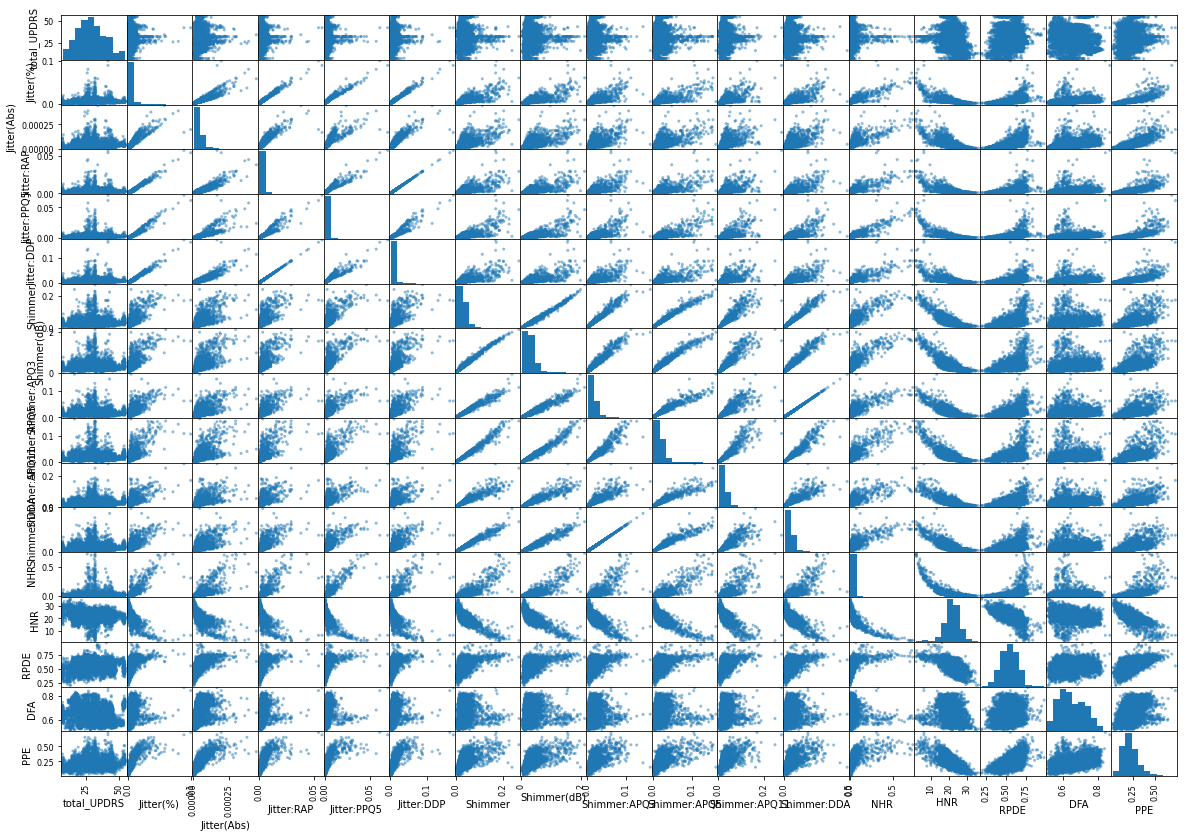

In [73]:
from pandas.plotting import scatter_matrix

attributes = parkinsons.drop(['motor_UPDRS', 'age', 'subject#', 'sex', 'test_time'], axis = 1)
scatter_matrix(attributes, figsize=(20, 14))

### Preparing data for ML algorithms

In [81]:
parkinsons = strat_train_set.drop(['motor_UPDRS', 'age', 'subject#', 'sex', 'test_time', 'total_UPDRS'], axis = 1) # drop labels for training set
parkinsons_labels = strat_train_set['total_UPDRS'].copy()

In [82]:
parkinsons.shape

(4700, 16)

In [83]:
parkinsons.isnull().value_counts()

Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  NHR    HNR    RPDE   DFA    PPE  
False      False        False       False        False       False    False        False         False         False          False        False  False  False  False  False    4700
dtype: int64

#### Scaling all attributes

In [84]:
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

parkinsons_prepared = num_pipeline.fit_transform(parkinsons)

In [85]:
parkinsons_prepared

array([[-0.15927278,  0.19941229, -0.28029128, ...,  0.82276791,
        -0.88655162, -0.1922895 ],
       [-0.84485783, -1.06271682, -0.73435222, ..., -1.64793022,
        -1.32225654, -1.39578629],
       [-0.42436567, -0.5822953 , -0.3559681 , ..., -0.99964034,
        -1.06505192, -0.88929114],
       ...,
       [ 0.08570961, -0.54026194,  0.09809285, ..., -0.68155883,
        -1.43436775,  0.95883088],
       [ 0.07291202,  0.12832232,  0.08493166, ...,  1.32314988,
         0.42268645,  0.67871616],
       [ 0.55739212,  0.26570652,  0.68047536, ..., -0.24717877,
         1.29692737,  0.56001234]])

### Model Training 

In [89]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(parkinsons_prepared, parkinsons_labels)

LinearRegression()

In [180]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

parkinsons_predictions = lin_reg.predict(parkinsons_prepared)
lin_mse = mean_squared_error(parkinsons_labels, parkinsons_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.210867868593956

#### Using cross validation to see model performance.

In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, parkinsons_prepared, parkinsons_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [ 9.98248205 10.29579237 10.2781634  10.57643349 10.30033528  9.91139601
 10.06213096 10.64412531 10.27395544 10.12335634]
Mean: 10.244817066606057
Standard deviation: 0.22476087026195563


### A few other algorithms

#### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(parkinsons_prepared, parkinsons_labels)

DecisionTreeRegressor(random_state=42)

In [99]:
parkinsons_predictions = tree_reg.predict(parkinsons_prepared)
tree_mse = mean_squared_error(parkinsons_labels, parkinsons_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.0070440700196175e-16

Overfitting suspected.

In [100]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, parkinsons_prepared, parkinsons_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [12.71692903 12.08500497 12.25469015 13.09578909 12.48237708 12.00354707
 11.95369083 12.37510629 12.83638233 11.90890142]
Mean: 12.371241825231452
Standard deviation: 0.38626581495042384


#### Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(parkinsons_prepared, parkinsons_labels)

RandomForestRegressor(random_state=42)

In [102]:
parkinsons_predictions = forest_reg.predict(parkinsons_prepared)
forest_mse = mean_squared_error(parkinsons_labels, parkinsons_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.179388578223845

In [103]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, parkinsons_prepared, parkinsons_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [8.62281539 8.658034   8.77159183 9.07890563 8.21022294 7.95348776
 7.99490859 8.6802933  8.71092543 8.66603192]
Mean: 8.534721678456052
Standard deviation: 0.34339798818225664


In [104]:
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      8.534722
std       0.361973
min       7.953488
25%       8.313371
50%       8.662033
75%       8.703267
max       9.078906
dtype: float64

#### SVR

In [105]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(parkinsons_prepared, parkinsons_labels)
parkinsons_predictions = svm_reg.predict(parkinsons_prepared)
svm_mse = mean_squared_error(parkinsons_labels, parkinsons_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

10.424146750068903

In [106]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_reg, parkinsons_prepared, parkinsons_labels,
                         scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(svm_rmse_scores)

Scores: [10.12708559 10.59340831 10.49866281 10.88714437 10.67608241 10.1364294
 10.03166222 10.92671647 10.29901795 10.25564803]
Mean: 10.44318575584751
Standard deviation: 0.30497733054523685


### As we can see Random Forest is a better algorithm for this application. However, for the scope of this assignment, let us fit the Linear Regression model on the test data set.

In [184]:
X_train = strat_train_set.drop(['motor_UPDRS', 'age', 'subject#', 'sex', 'test_time', 'total_UPDRS'], axis = 1) # drop labels for training set
y_train = strat_train_set['total_UPDRS'].copy()

X_train_prepared = num_pipeline.fit_transform(X_train) # feature scaling using standarscaler 

X_test = strat_test_set.drop(['motor_UPDRS', 'age', 'subject#', 'sex', 'test_time', 'total_UPDRS'], axis = 1) # drop labels for training set
y_test = strat_test_set['total_UPDRS'].copy()

X_test_prepared = num_pipeline.transform(X_test) # feature scaling using standarscaler. only transform on test set.

In [185]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [186]:
pred = lin_reg.predict(X_test_prepared)

In [187]:
print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)

Intercept: 
 28.932231936170115
Coefficients: 
 [ 2.99684572e+00 -1.37397057e+00 -8.96653051e+01 -1.26394028e+00
  8.94205881e+01  3.45779807e+00 -1.27374703e+00 -9.92343257e+02
 -2.60133871e+00  2.04724114e+00  9.90541208e+02 -2.37381616e+00
 -2.43844250e+00  6.86269581e-01 -2.80006921e+00  1.78009679e+00]


In [188]:
mse = mean_squared_error(y_test, pred)
mse

98.41647487316702

In [189]:
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 9.920507793110543


In [190]:
y_test.shape

(1175,)

In [191]:
print('Coefficient of determination: %.2f'% r2_score(y_test, pred))

Coefficient of determination: 0.10


## Simple Multivariate regression on Happiness dataset. Previously submitted with Assignment 03-04.

## A) Happiness dataset 2015. 

### Problem Statement:

### Multivariate linear regression: To find out the effect of multiple attributes such as GDP, Family, Health, Freedom, Trust on government, Generosity and Dystopia residual on the happiness score of a country and predict the happiness score for a given input values. 

In [142]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math

In [143]:
happy1 = pd.read_csv("2015.csv")

In [144]:
happy1.shape

(158, 12)

In [145]:
happy1.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [146]:
happy1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### Multivariate

### Plotting Co-relations.

array([[<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>],
       [<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Family', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Economy

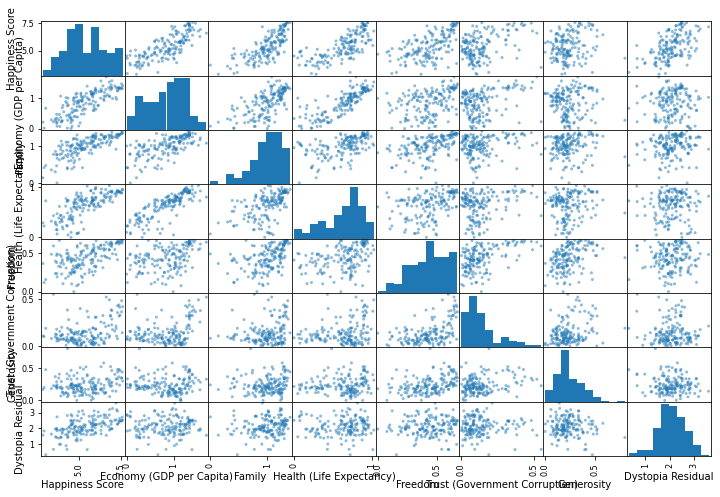

In [168]:
from pandas.plotting import scatter_matrix
attributes = ["Happiness Score", "Economy (GDP per Capita)","Family","Health (Life Expectancy)", "Freedom","Trust (Government Corruption)", "Generosity", "Dystopia Residual"]
scatter_matrix(happy1[attributes], figsize=(12, 8))

### Setting features and target, performing linear regression.

In [169]:
X = happy1[happy1.drop(['Happiness Score', 'Country', 'Region', 'Happiness Rank', 'Standard Error', ], axis = 1).columns]
print(X.columns)

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


In [170]:
Y = happy1['Happiness Score']

In [171]:
# print(Y)
# print(len(Y))

In [172]:
len(X), len(Y)

(158, 158)

In [173]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 40)

In [174]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.00014161846153726287
Coefficients: 
 [1.00006353 1.00005334 0.99983383 0.99962612 1.00003546 0.99994571
 1.00000954]


In [175]:
y_pred = regr.predict(x_test)

### Making Prediction.

In [176]:
new_GDP = 1.4
new_family = 1.3
new_health = 0.9
new_freedom = 0.65
new_trust = 0.4
new_gen = 0.3
new_dystopia = 2.4

regr.predict([[new_GDP, new_family, new_health, new_freedom, new_trust, new_gen, new_dystopia]])

array([7.34992812])

In [177]:
mean_squared_error(y_test, y_pred)

9.949238047181714e-08

In [178]:
r2_score(y_test, y_pred)

0.999999916981469

### We observe that in case of happiness dataset, the multivariate linear regression has resulted in a better prediction than the univariate linear regression.